## Target:
- more Albumentation Augmentation such as hue, saturation, brightness and contract
- rectangular patches in cutout
- adding batch norm inbetween pointwise convolutions and other conv layers
- larger starting learning rate, then step down hitting on plateau

## Result:
- target accuracy: 82.7%
- test accuracy: 85.98%

## Analysis:
- increaseing learning rate doesn't work well
- adding more augmentation prevents overfitting in training data

# Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Dataset and Creating Train/Test Split

In [2]:
from data_loader import prepare_cifar_dataloader,\
    RAW_DATA_MEAN, NORM_DATA_MEAN, NORM_DATA_STD
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']
train_loader, test_loader = prepare_cifar_dataloader()

Files already downloaded and verified
Files already downloaded and verified


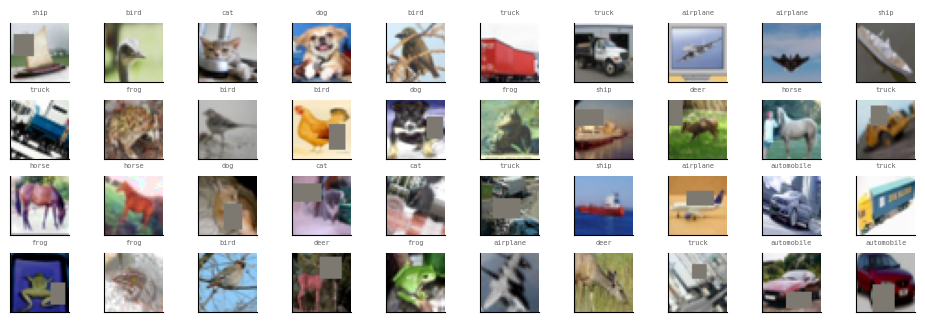

In [3]:
import numpy as np
import utils
import matplotlib.pyplot as plt


utils.plot_img_batch(train_loader, class_labels, ncols=10, nrows=4)

In [4]:
from torchsummary import summary
import model
channels = [
    32, 32, 32, 64, 
    16, 64, 32, 64, 
    16, 64, 32, 64, 
    16, 64, 32, 128, 
    128, 10
]
network = model.Net(channels=channels, dropout_value=0.02).to('cpu')
summary(network, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]           4,704
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
         ConvLayer-9           [-1, 32, 32, 32]               0
           Conv2d-10           [-1, 32, 32, 32]           9,216
             ReLU-11           [-1, 32, 32, 32]               0
      BatchNorm2d-12           [-1, 32, 32, 32]              64
          Dropout-13           [-1, 32, 32, 32]               0
        ConvLayer-14           [-1, 32,

EPOCH: 0


Loss=1.6057 Batch_id=97 Accuracy=32.02: 100%|██████████| 98/98 [00:16<00:00,  5.99it/s]


Test set: Average loss: 1.7199, Accuracy: 3923/10000 (39.23%)

EPOCH: 1


Loss=1.4735 Batch_id=97 Accuracy=41.55: 100%|██████████| 98/98 [00:15<00:00,  6.39it/s]


Test set: Average loss: 1.5015, Accuracy: 4632/10000 (46.32%)

EPOCH: 2


Loss=1.5152 Batch_id=97 Accuracy=45.50: 100%|██████████| 98/98 [00:15<00:00,  6.38it/s]


Test set: Average loss: 1.5083, Accuracy: 4725/10000 (47.25%)

EPOCH: 3


Loss=1.2965 Batch_id=97 Accuracy=49.14: 100%|██████████| 98/98 [00:15<00:00,  6.38it/s]


Test set: Average loss: 1.2603, Accuracy: 5415/10000 (54.15%)

EPOCH: 4


Loss=1.3342 Batch_id=97 Accuracy=51.44: 100%|██████████| 98/98 [00:15<00:00,  6.39it/s]


Test set: Average loss: 1.2324, Accuracy: 5565/10000 (55.65%)

EPOCH: 5


Loss=1.2450 Batch_id=97 Accuracy=54.42: 100%|██████████| 98/98 [00:15<00:00,  6.38it/s]


Test set: Average loss: 1.1855, Accuracy: 5899/10000 (58.99%)

EPOCH: 6


Loss=1.2080 Batch_id=97 Accuracy=56.76: 100%|██████████| 98/98 [00:15<00:00,  6.41it/s]


Test set: Average loss: 1.1808, Accuracy: 5870/10000 (58.70%)

EPOCH: 7


Loss=1.1531 Batch_id=97 Accuracy=59.34: 100%|██████████| 98/98 [00:15<00:00,  6.42it/s]


Test set: Average loss: 1.0031, Accuracy: 6470/10000 (64.70%)

EPOCH: 8


Loss=1.1035 Batch_id=97 Accuracy=60.61: 100%|██████████| 98/98 [00:15<00:00,  6.44it/s]


Test set: Average loss: 0.9187, Accuracy: 6734/10000 (67.34%)

EPOCH: 9


Loss=1.0831 Batch_id=97 Accuracy=63.16: 100%|██████████| 98/98 [00:15<00:00,  6.46it/s]


Test set: Average loss: 0.9179, Accuracy: 6711/10000 (67.11%)

EPOCH: 10


Loss=1.0870 Batch_id=97 Accuracy=64.69: 100%|██████████| 98/98 [00:15<00:00,  6.45it/s]


Test set: Average loss: 0.8660, Accuracy: 7012/10000 (70.12%)

EPOCH: 11


Loss=0.9443 Batch_id=97 Accuracy=65.79: 100%|██████████| 98/98 [00:15<00:00,  6.47it/s]


Test set: Average loss: 0.9594, Accuracy: 6807/10000 (68.07%)

EPOCH: 12


Loss=0.9749 Batch_id=97 Accuracy=66.90: 100%|██████████| 98/98 [00:15<00:00,  6.47it/s]


Test set: Average loss: 0.8172, Accuracy: 7146/10000 (71.46%)

EPOCH: 13


Loss=0.8099 Batch_id=97 Accuracy=68.41: 100%|██████████| 98/98 [00:15<00:00,  6.46it/s]


Test set: Average loss: 0.7629, Accuracy: 7358/10000 (73.58%)

EPOCH: 14


Loss=0.8040 Batch_id=97 Accuracy=69.04: 100%|██████████| 98/98 [00:15<00:00,  6.45it/s]


Test set: Average loss: 0.7239, Accuracy: 7489/10000 (74.89%)

EPOCH: 15


Loss=0.8663 Batch_id=97 Accuracy=70.16: 100%|██████████| 98/98 [00:15<00:00,  6.46it/s]


Test set: Average loss: 0.7490, Accuracy: 7409/10000 (74.09%)

EPOCH: 16


Loss=0.9494 Batch_id=97 Accuracy=70.68: 100%|██████████| 98/98 [00:15<00:00,  6.44it/s]


Test set: Average loss: 0.7370, Accuracy: 7456/10000 (74.56%)

EPOCH: 17


Loss=0.8000 Batch_id=97 Accuracy=71.41: 100%|██████████| 98/98 [00:15<00:00,  6.46it/s]


Test set: Average loss: 0.6837, Accuracy: 7659/10000 (76.59%)

EPOCH: 18


Loss=0.8591 Batch_id=97 Accuracy=72.19: 100%|██████████| 98/98 [00:15<00:00,  6.44it/s]


Test set: Average loss: 0.6661, Accuracy: 7700/10000 (77.00%)

EPOCH: 19


Loss=0.7855 Batch_id=97 Accuracy=73.12: 100%|██████████| 98/98 [00:15<00:00,  6.45it/s]


Test set: Average loss: 0.6930, Accuracy: 7626/10000 (76.26%)

EPOCH: 20


Loss=0.7684 Batch_id=97 Accuracy=73.41: 100%|██████████| 98/98 [00:15<00:00,  6.45it/s]


Test set: Average loss: 0.6324, Accuracy: 7792/10000 (77.92%)

EPOCH: 21


Loss=0.7843 Batch_id=97 Accuracy=74.15: 100%|██████████| 98/98 [00:15<00:00,  6.45it/s]


Test set: Average loss: 0.6213, Accuracy: 7867/10000 (78.67%)

EPOCH: 22


Loss=0.7778 Batch_id=97 Accuracy=74.45: 100%|██████████| 98/98 [00:15<00:00,  6.43it/s]


Test set: Average loss: 0.6213, Accuracy: 7916/10000 (79.16%)

EPOCH: 23


Loss=0.7643 Batch_id=97 Accuracy=75.05: 100%|██████████| 98/98 [00:15<00:00,  6.44it/s]


Test set: Average loss: 0.6624, Accuracy: 7793/10000 (77.93%)

EPOCH: 24


Loss=0.6415 Batch_id=97 Accuracy=75.69: 100%|██████████| 98/98 [00:15<00:00,  6.43it/s]


Test set: Average loss: 0.5886, Accuracy: 7953/10000 (79.53%)

EPOCH: 25


Loss=0.7032 Batch_id=97 Accuracy=75.81: 100%|██████████| 98/98 [00:15<00:00,  6.43it/s]


Test set: Average loss: 0.5883, Accuracy: 8013/10000 (80.13%)

EPOCH: 26


Loss=0.7180 Batch_id=97 Accuracy=75.99: 100%|██████████| 98/98 [00:15<00:00,  6.38it/s]


Test set: Average loss: 0.5616, Accuracy: 8045/10000 (80.45%)

EPOCH: 27


Loss=0.6477 Batch_id=97 Accuracy=76.25: 100%|██████████| 98/98 [00:15<00:00,  6.41it/s]


Test set: Average loss: 0.5739, Accuracy: 8066/10000 (80.66%)

EPOCH: 28


Loss=0.5647 Batch_id=97 Accuracy=76.73: 100%|██████████| 98/98 [00:15<00:00,  6.46it/s]


Test set: Average loss: 0.5501, Accuracy: 8127/10000 (81.27%)

EPOCH: 29


Loss=0.7995 Batch_id=97 Accuracy=76.84: 100%|██████████| 98/98 [00:15<00:00,  6.35it/s]


Test set: Average loss: 0.5601, Accuracy: 8111/10000 (81.11%)

EPOCH: 30


Loss=0.5906 Batch_id=97 Accuracy=77.60: 100%|██████████| 98/98 [00:15<00:00,  6.40it/s]


Test set: Average loss: 0.5443, Accuracy: 8162/10000 (81.62%)

EPOCH: 31


Loss=0.4898 Batch_id=97 Accuracy=77.68: 100%|██████████| 98/98 [00:15<00:00,  6.42it/s]


Test set: Average loss: 0.5761, Accuracy: 8089/10000 (80.89%)

EPOCH: 32


Loss=0.7284 Batch_id=97 Accuracy=77.81: 100%|██████████| 98/98 [00:15<00:00,  6.40it/s]


Test set: Average loss: 0.5539, Accuracy: 8126/10000 (81.26%)

EPOCH: 33


Loss=0.5933 Batch_id=97 Accuracy=80.15: 100%|██████████| 98/98 [00:15<00:00,  6.45it/s]


Test set: Average loss: 0.4556, Accuracy: 8438/10000 (84.38%)

EPOCH: 34


Loss=0.5130 Batch_id=97 Accuracy=81.07: 100%|██████████| 98/98 [00:15<00:00,  6.43it/s]


Test set: Average loss: 0.4471, Accuracy: 8475/10000 (84.75%)

EPOCH: 35


Loss=0.5324 Batch_id=97 Accuracy=81.38: 100%|██████████| 98/98 [00:15<00:00,  6.42it/s]


Test set: Average loss: 0.4551, Accuracy: 8464/10000 (84.64%)

EPOCH: 36


Loss=0.5495 Batch_id=97 Accuracy=81.29: 100%|██████████| 98/98 [00:15<00:00,  6.33it/s]


Test set: Average loss: 0.4443, Accuracy: 8516/10000 (85.16%)

EPOCH: 37


Loss=0.5561 Batch_id=97 Accuracy=81.17: 100%|██████████| 98/98 [00:15<00:00,  6.38it/s]


Test set: Average loss: 0.4409, Accuracy: 8520/10000 (85.20%)

EPOCH: 38


Loss=0.4960 Batch_id=97 Accuracy=82.28: 100%|██████████| 98/98 [00:15<00:00,  6.35it/s]


Test set: Average loss: 0.4246, Accuracy: 8572/10000 (85.72%)

EPOCH: 39


Loss=0.4687 Batch_id=97 Accuracy=82.62: 100%|██████████| 98/98 [00:15<00:00,  6.43it/s]


Test set: Average loss: 0.4244, Accuracy: 8572/10000 (85.72%)

EPOCH: 40


Loss=0.5384 Batch_id=97 Accuracy=82.73: 100%|██████████| 98/98 [00:15<00:00,  6.44it/s]


Test set: Average loss: 0.4252, Accuracy: 8569/10000 (85.69%)

EPOCH: 41


Loss=0.5486 Batch_id=97 Accuracy=82.65: 100%|██████████| 98/98 [00:15<00:00,  6.44it/s]


Test set: Average loss: 0.4233, Accuracy: 8572/10000 (85.72%)

EPOCH: 42


Loss=0.4844 Batch_id=97 Accuracy=82.67: 100%|██████████| 98/98 [00:15<00:00,  6.43it/s]


Test set: Average loss: 0.4222, Accuracy: 8598/10000 (85.98%)



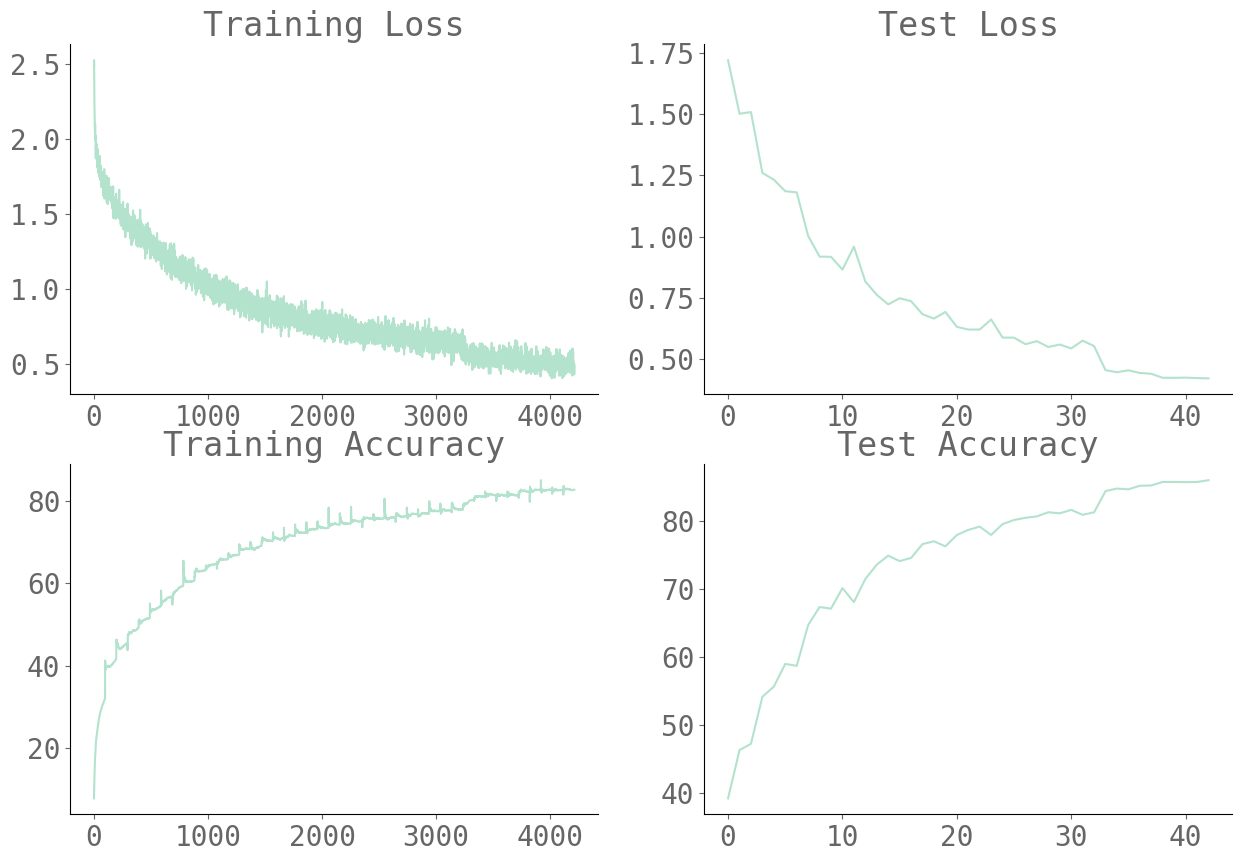

In [5]:
from torch import optim
from torchvision import datasets
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau
from model import train, test, plot_loss_n_acc, get_pred_n_actuals
from utils import plot_misclassified_images

device = 'mps:0'
EPOCHS = 100
network.to(device)
optimizer = optim.Adam(network.parameters(), lr=0.01)
scheduler = ReduceLROnPlateau(optimizer, patience=3,
    threshold=1e-2, mode='max', factor=0.25)

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    model.train(network, device, train_loader, optimizer)
    test_acc = model.test(network, device, test_loader)
    scheduler.step(test_acc)
    if test_acc > 85.9:
        break

plot_loss_n_acc()


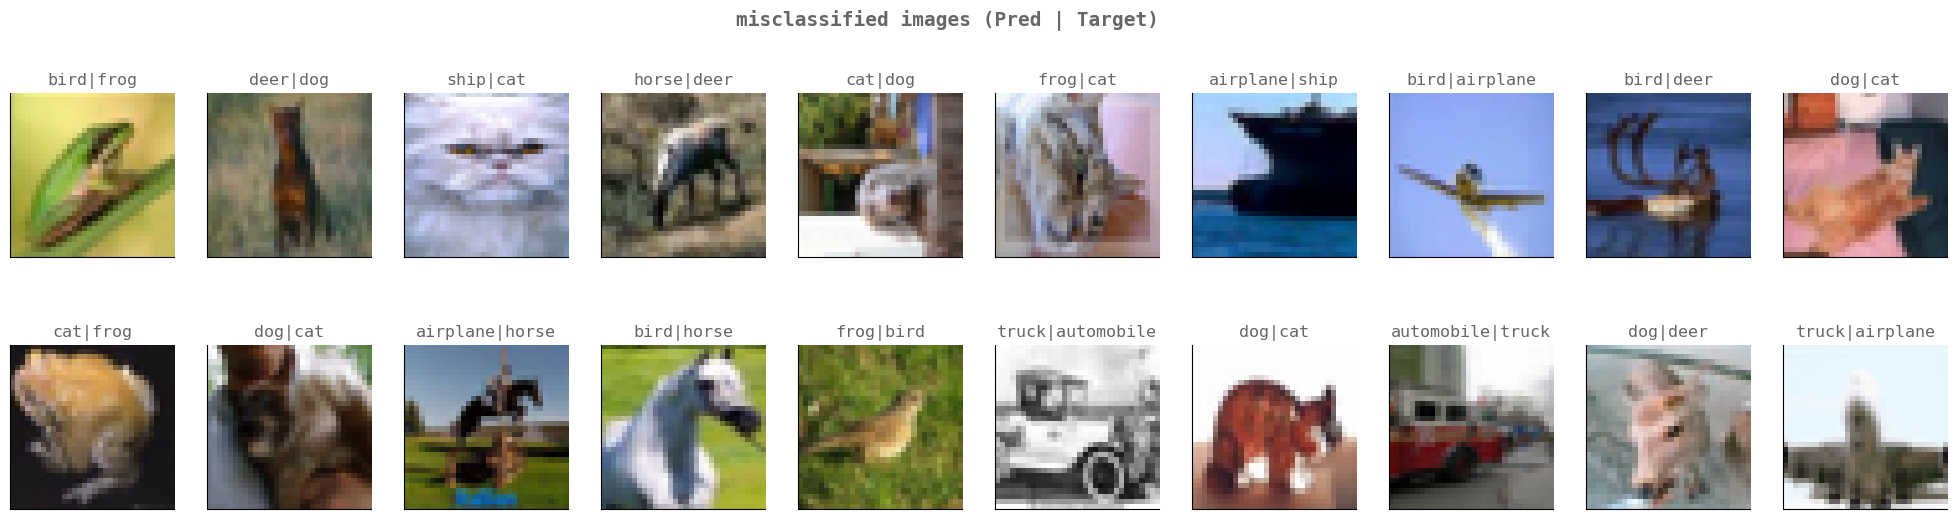

In [6]:
device='mps:0'
labels_df = get_pred_n_actuals(network, test_loader, device)
plot_misclassified_images(labels_df, test_loader.dataset, 
        class_labels, n_samples=20,
        nrows=2, ncols=10, figsize=(25,6),
        title='misclassified images (Pred | Target)', )

Accuracy for class: airplane is 87.9 %
Accuracy for class: automobile is 94.3 %
Accuracy for class: bird  is 80.4 %
Accuracy for class: cat   is 70.1 %
Accuracy for class: deer  is 84.4 %
Accuracy for class: dog   is 78.7 %
Accuracy for class: frog  is 89.3 %
Accuracy for class: horse is 89.0 %
Accuracy for class: ship  is 93.4 %
Accuracy for class: truck is 92.3 %


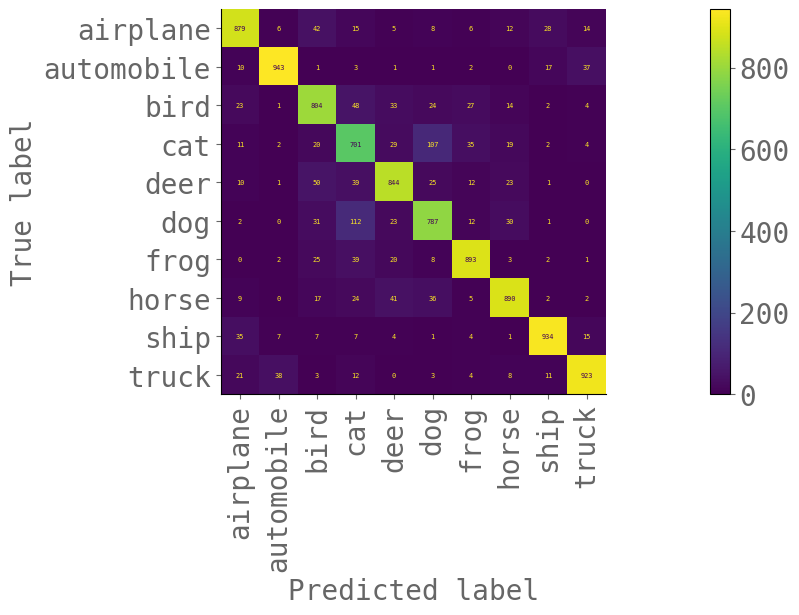

In [32]:
from metrics import get_metrics
get_metrics(labels_df, class_labels)